# Data Analysis Jupyter Notebook

This Jupyter Notebook is a template for data analysis. It includes installation of necessary libraries, loading datasets, and displaying basic information and statistics for each dataset.


## Environment preparation

First of all, we will install all the required packages:


In [447]:
#capture
#!python -m pip install --upgrade pip
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy
#!pip install geopandas

## Data Understanding

We will read the datasets in order to understand the information that they contain.

In [448]:
# Import necessary libraries
import pandas as pd

# Load the three datasets
incidents_dataset = pd.read_csv('./project_datasets/incidents.csv', low_memory=False)
pbsy_dataset = pd.read_csv('./project_datasets/povertyByStateYear.csv')
ysdh_dataset = pd.read_csv('./project_datasets/year_state_district_house.csv')

After reading the datasets, we will execute some commands to have a preview about the information.

With `info()`, we will see the names of the columns of the datasets, the data type and the amount of non null values that they have. With `head()`, the first 5 rows of each dataset, that they will help us to have the idea of the dataset row types. Eventually, with `describe()` we will obtain the statisctical values of the numerical columns.

In [449]:
# Display basic information about each dataset
print("\n------- Incidents Info:-------")
print(incidents_dataset.info())

print("\n------- Dataset 2 Info:-------")
print(pbsy_dataset.info())

print("\n------- Dataset 3 Info:-------")
print(ysdh_dataset.info())


------- Incidents Info:-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 1

In [450]:
# Display the first few rows of each dataset
print("------- Incidents -------")
print(incidents_dataset.head())

print("\n------- Poverty By State and Year -------")
print(pbsy_dataset.head())

print("\n------- Year State District House -------")
print(ysdh_dataset.head())

------- Incidents -------
         date                 state city_or_county   
0  2015-05-02               Indiana   Indianapolis  \
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude   
0       Lafayette Road and Pike Plaza   39.8322   -86.2492  \
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district   
0                     7.0                  94.0                   33.0  \
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0       

Here we can see that the data types of some of the columns are not correct, so we will fix them. For example, `date` columns has data type `object`, so we will convert it on datetime and some columns that contain numeric values are as `object` type as well, so we will change them. Also here, the modifications are done in the incidents dataset.

In [451]:
# Convert the 'date' column to datetime
incidents_dataset['date'] = pd.to_datetime(incidents_dataset['date'])

# Convert numeric data from object to numeric, handling errors
incidents_dataset['state_senate_district'] = pd.to_numeric(incidents_dataset['state_senate_district'], errors='coerce')
incidents_dataset['min_age_participants'] = pd.to_numeric(incidents_dataset['min_age_participants'], errors='coerce')
incidents_dataset['max_age_participants'] = pd.to_numeric(incidents_dataset['max_age_participants'], errors='coerce')
incidents_dataset['avg_age_participants'] = pd.to_numeric(incidents_dataset['avg_age_participants'], errors='coerce')
incidents_dataset['n_participants_child'] = pd.to_numeric(incidents_dataset['n_participants_child'], errors='coerce').astype('Int64')
incidents_dataset['n_participants_teen'] = pd.to_numeric(incidents_dataset['n_participants_teen'], errors='coerce').astype('Int64')
incidents_dataset['n_participants_adult'] = pd.to_numeric(incidents_dataset['n_participants_adult'], errors='coerce').astype('Int64')

# Verify the data types after conversion
print("\nData Types After Conversion:\n ---- Dataset 1 ----\n", incidents_dataset.dtypes)
print("\n ---- Dataset 2 ----\n", pbsy_dataset.dtypes)
print("\n ---- Dataset 3 ----\n", ysdh_dataset.dtypes)



Data Types After Conversion:
 ---- Dataset 1 ----
 date                         datetime64[ns]
state                                object
city_or_county                       object
address                              object
latitude                            float64
longitude                           float64
congressional_district              float64
state_house_district                float64
state_senate_district               float64
participant_age1                    float64
participant_age_group1               object
participant_gender1                  object
min_age_participants                float64
avg_age_participants                float64
max_age_participants                float64
n_participants_child                  Int64
n_participants_teen                   Int64
n_participants_adult                  Int64
n_males                             float64
n_females                           float64
n_killed                              int64
n_injured               

In [452]:
# Display basic statistics for each dataset
print("\n------- Incidents Statistics:-------")
print(incidents_dataset.describe())

print("\n------- Poverty By State and Year Statistics:-------")
print(pbsy_dataset.describe())

print("\n------- Dataset 3 Statistics:-------")
print(ysdh_dataset.describe())



------- Incidents Statistics:-------
                                date       latitude      longitude   
count                         239677  231754.000000  231754.000000  \
mean   2017-08-21 02:54:15.871860480      37.546598     -89.338348   
min              2013-01-01 00:00:00      19.111400    -171.429000   
25%              2015-07-11 00:00:00      33.903400     -94.158725   
50%              2016-08-25 00:00:00      38.570600     -86.249600   
75%              2017-08-09 00:00:00      41.437375     -80.048625   
max              2030-11-28 00:00:00      71.336800      97.433100   
std                              NaN       5.130763      14.359546   

       congressional_district  state_house_district  state_senate_district   
count           227733.000000         200905.000000           207342.00000  \
mean                 8.001265             55.447132               20.47711   
min                  0.000000              1.000000                1.00000   
25%                

### Datasets columns description

After analyzing the datasets with the previous commands, we will briefly describe each of the columns of the three datasets:

#### Incidents Dataset (incidents.csv)

- **Date of Incident (`date`):** This variable represents the date when the gun incident occurred.
- **State (`state`):** Indicates the state where the incident took place.
- **City or County (`city_or_county`):** Specifies the city or county where the incident occurred.
- **Address (`address`):** Represents the specific address where the incident took place.
- **Geographical Coordinates (`latitude, longitude`):** Provides the latitude and longitude of the incident location.
- **Congressional District (`congressional_district`):** Specifies the congressional district where the incident occurred.
- **State House District (`state_house_district`):** Represents the state house district of the incident.
- **State Senate District (`state_senate_district`):** Indicates the state senate district where the incident took place.
- **Participant Age (`participant_age1`):** Represents the exact age of one randomly chosen participant in the incident.
- **Participant Age Group (`participant_age_group1`):** Specifies the age group of one randomly chosen participant.
- **Participant Gender (`participant_gender1`):** Indicates the gender of one randomly chosen participant.
- **Minimum, Average, and Maximum Age of Participants (`min_age_participants, avg_age_participants, max_age_participants`):** Provide statistical measures of participant ages.
- **Number of Participants by Age Group (`n_participants_child, n_participants_teen, n_participants_adult`):** Gives the count of participants in different age groups.
- **Number of Males and Females (`n_males, n_females`):** Specifies the count of male and female participants.
- **Number of People Killed and Injured (`n_killed, n_injured`):** Represents the count of people killed and injured in the incident.
- **Number of Arrested and Unharmed Participants (`n_arrested, n_unharmed`):** Indicates the count of participants arrested and unharmed.
- **Total Number of Participants (`n_participants`):** Represents the total number of participants in the incident.
- **Additional Notes (`notes`):** Provides additional information or notes about the incident.
- **Incident Characteristics (`incident_characteristics1, incident_characteristics2`):** Specifies the characteristics of the incident.

#### Poverty By State and Year Dataset (povertyByStateYear.csv)

- **State (`state`):** The name of the state.
- **Year (`year`):** The year for which the poverty rate is recorded.
- **Poverty percentage (`povertyPercentage`):** The percentage of the population in poverty for a specific state and year.

#### Year State District House Dataset (year_state_district_house.csv)

- **Year (`year`):** The year of the election.
- **State (`state`):** The name of the state for which election results are recorded.
- **State (`congressional_district`):** The congressional district number for which election results are recorded.
- **Party (`party`):** The political party associated with the candidate.
- **Candidate votes (`candidatevotes`):** The number of votes received by a specific candidate in a particular congressional district.
- **Total votes (`totalvotes`):** The total number of votes cast in a particular congressional district.

### Data Quality Assessment

After having the idea of the content of the dataset, we will performa a analysis of the quality of the data.

Firstly, we will check for missing values in the dataset 1 columns. We will perform this analysis in the dataset of incidents only, because the other two do not have missing values.

With the next graph we can see the distribution of missing values for each column. For example, we can see that the column with more missing values is  `incident_characteristic2`. This occurs because most of the incidents do not have two characteristics, but just one, since we can see that `incident_characteristic1` has almost no missing values.

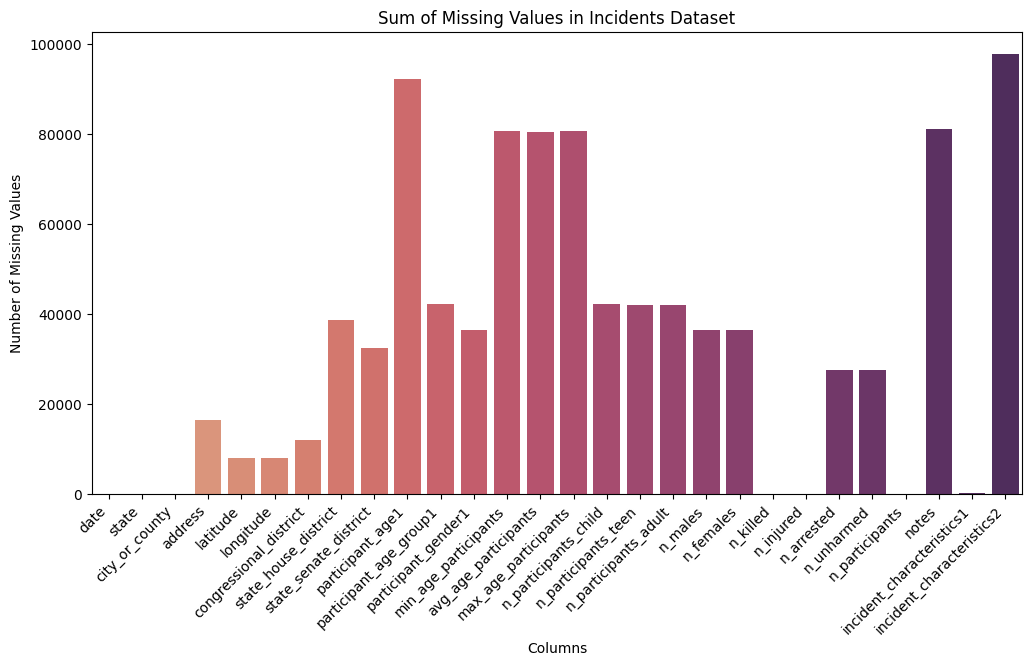

In [453]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = incidents_dataset.isnull().sum()
#print("\nMissing Values:\n", missing_values)

# Plotting the sum of missing values for each column using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='flare', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Sum of Missing Values in Incidents Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

The data that doesn't have any `adress` and any `latitude` and `longitude` will be eliminated since it does not make sense that an **incident** has not occurred anywhere and also the number of **incidents** with this condition is insignificant compared to the number of **total incidents**. If the `address` column is not null and any of the `latitude` and `longitude` columns are null, they will be replaced by **no_data** and vice versa.

For `congressional_district`, `state_house_district`, and `state_senate_district` since it does not make sense to put the average and also when having the `address` or the `latitude` and `longitude` these columns can be as **no_data** without problem.

With the column of `participant_age1` we will fill the nulls with the **average** of the rest of the non-null data.



With the rest of the columns that are of **type object**, since the number of nulls is significantly large we cannot eliminate it so we will leave it as **no_data**.

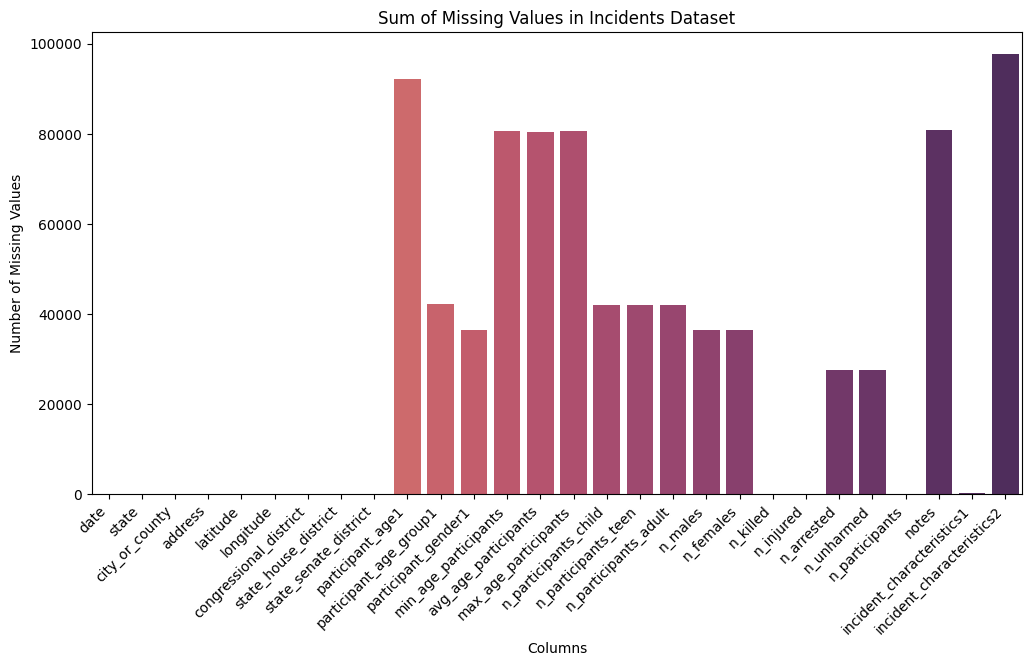

In [454]:
# Eliminate the data that have null in adress and latitude, and in adress and longitude
incidents_dataset = incidents_dataset.dropna(subset=['address', 'latitude'], how='all', inplace=False)
incidents_dataset = incidents_dataset.dropna(subset=['address', 'longitude'], how='all', inplace=False)
# Rename the other nulls with no_data
valor_reemplazo = 'no_data'
incidents_dataset['address'].fillna(valor_reemplazo, inplace=True)
incidents_dataset['latitude'].fillna(valor_reemplazo, inplace=True)
incidents_dataset['longitude'].fillna(valor_reemplazo, inplace=True)

incidents_dataset['congressional_district'].fillna(valor_reemplazo, inplace=True)
incidents_dataset['state_house_district'].fillna(valor_reemplazo, inplace=True)
incidents_dataset['state_senate_district'].fillna(valor_reemplazo, inplace=True)

# Print mising values label
missing_values = incidents_dataset.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='flare', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Sum of Missing Values in Incidents Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

After that, we will check for duplicated values in the datasets. We can see that the incidents dataset is the only one that has duplicates, so we remove them and then verify that we have done it correctly.

In [455]:
# Check for duplicates
d1_duplicates = incidents_dataset.duplicated().sum()
print("\nNumber of Duplicates:", d1_duplicates)

# Remove duplicate rows
incidents_dataset.drop_duplicates(inplace=True)

# Verify the removal of duplicates
d1_duplicates_after_removal = incidents_dataset.duplicated().sum()
print("\nNumber of Duplicates After Removal:", d1_duplicates_after_removal)



Number of Duplicates: 296

Number of Duplicates After Removal: 0


In [456]:
# Check for duplicates
d2_duplicates = pbsy_dataset.duplicated().sum()
print("\nNumber of Duplicates:", d2_duplicates)


Number of Duplicates: 0


In [457]:
# Check for duplicates
d3_duplicates = ysdh_dataset.duplicated().sum()
print("\nNumber of Duplicates:", d3_duplicates)


Number of Duplicates: 0


### Distribution of variables

Then, we will see the distribution of the variables. To start, we will see the distribution of the poverty rates. We can see that even tough there are some rates that are higher, the distribution is normal, with clear ranges.

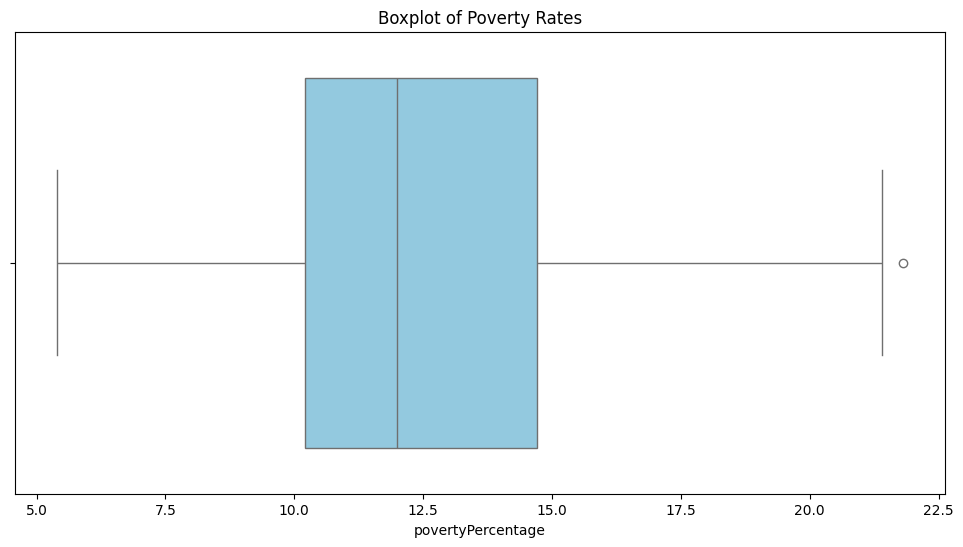

In [458]:
from scipy.stats.mstats import winsorize

# Visualize the distribution of povertyPercentage for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=pbsy_dataset, x='povertyPercentage', color='skyblue')
plt.title('Boxplot of Poverty Rates')
plt.show()

# Handle outliers (if any)
pbsy_dataset['povertyPercentage'] = winsorize(pbsy_dataset['povertyPercentage'], limits=[0.05, 0.05])


Same occurs with the boxplots of the votes, where we can see a normal distribution:

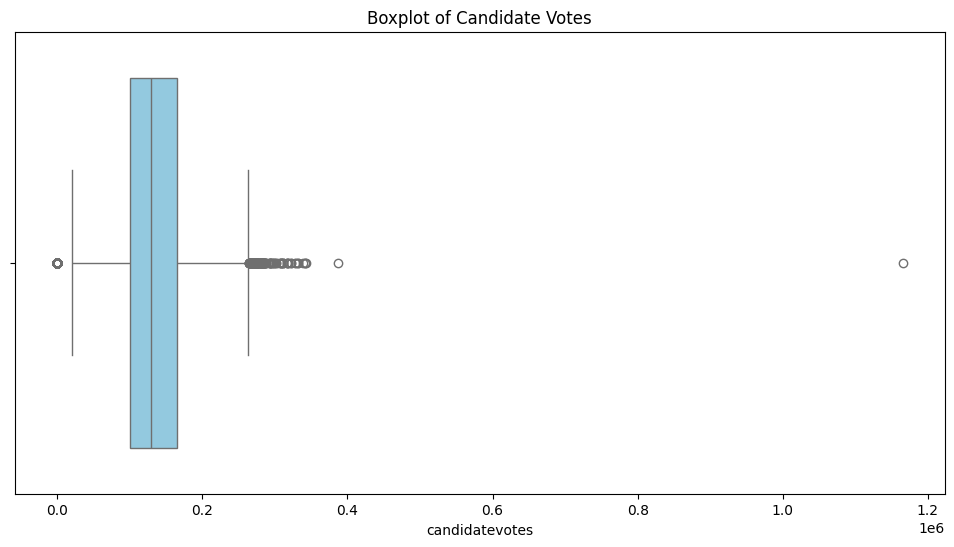

In [459]:
# Visualize the distribution of candidatevotes for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=ysdh_dataset, x='candidatevotes', color='skyblue')
plt.title('Boxplot of Candidate Votes')
plt.show()

# Handle outliers (if any)
ysdh_dataset['candidatevotes'] = winsorize(ysdh_dataset['candidatevotes'], limits=[0.05, 0.05])


#### Evolution of Incidents Over Time

The evolution of the incidents over time is one of the most relevant topics to analyze, so in the next graph we display it. We can see something strange. There are values that start around 2014, that finish around middle of 2018, and then values that restart in 2028. We don't know why that data is in the dataset, if by mistake or if it is some kind of prediction that they have made, where they have the incident data that they would like to have for the future. Whatever it is, for our analysis the future data is not relevant, so we are going to remove it.

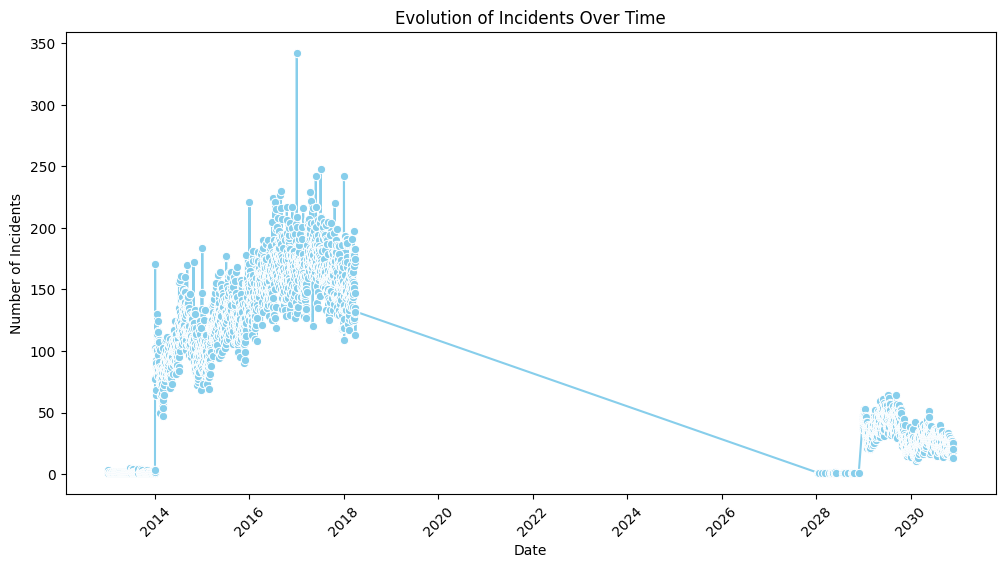

In [460]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [461]:
# Filter out rows with 'date' in the future
incidents_dataset = incidents_dataset[incidents_dataset['date'].dt.year < 2028]

# Verify the changes
print(incidents_dataset['date'].describe())


count                           216059
mean     2016-05-04 03:33:20.903457024
min                2013-01-01 00:00:00
25%                2015-05-27 00:00:00
50%                2016-06-19 00:00:00
75%                2017-05-05 00:00:00
max                2018-03-31 00:00:00
Name: date, dtype: object


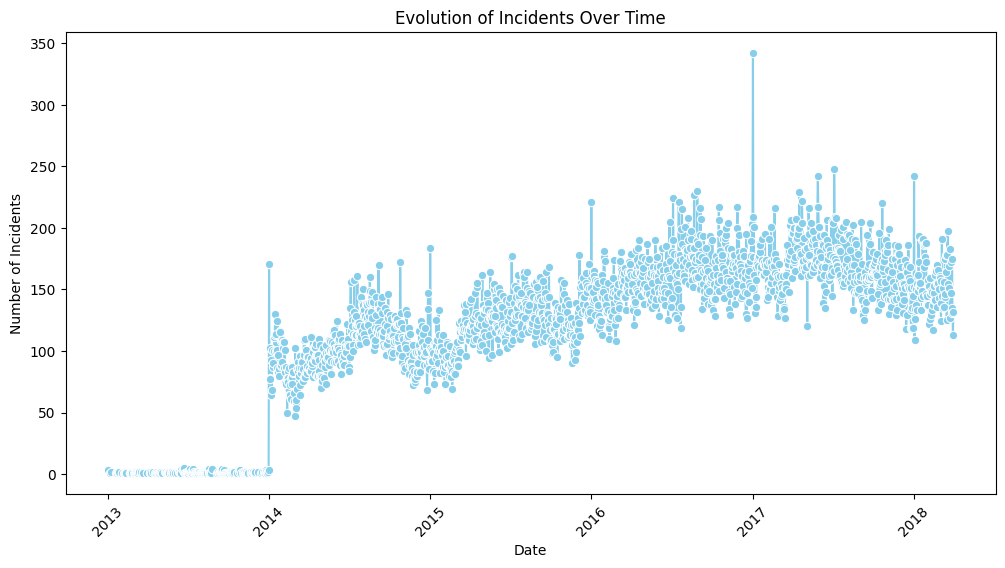

In [462]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

Next issue that we can see is the difference between the incidents until 2014, with the incidents between 2014 and 2018. This does not occur because 2013 was the safest year of the history, but because there are way less values in the dataset than in the rest of the years. Therefore, in order not to alter the results, we have decided to remove entries older than 2014.

In [463]:
# Extract the year from the 'date' column and create a new 'year' column
incidents_dataset['year'] = incidents_dataset['date'].dt.year

# Count the number of incidents by year
incident_counts_by_year = incidents_dataset['year'].value_counts().sort_index()

# Display the counts
print("Number of Incidents by Year:")
print(incident_counts_by_year)

Number of Incidents by Year:
year
2013      252
2014    37581
2015    44572
2016    58567
2017    61299
2018    13788
Name: count, dtype: int64


In [464]:
# Filter out rows with 'date' in the future
incidents_dataset = incidents_dataset[incidents_dataset['date'].dt.year > 2013]

# Verify the changes
print(incidents_dataset['date'].describe())

count                           215807
mean     2016-05-05 08:11:05.527994624
min                2014-01-01 00:00:00
25%                2015-05-29 00:00:00
50%                2016-06-20 00:00:00
75%                2017-05-05 00:00:00
max                2018-03-31 00:00:00
Name: date, dtype: object


Final result of the plot would be the next one:

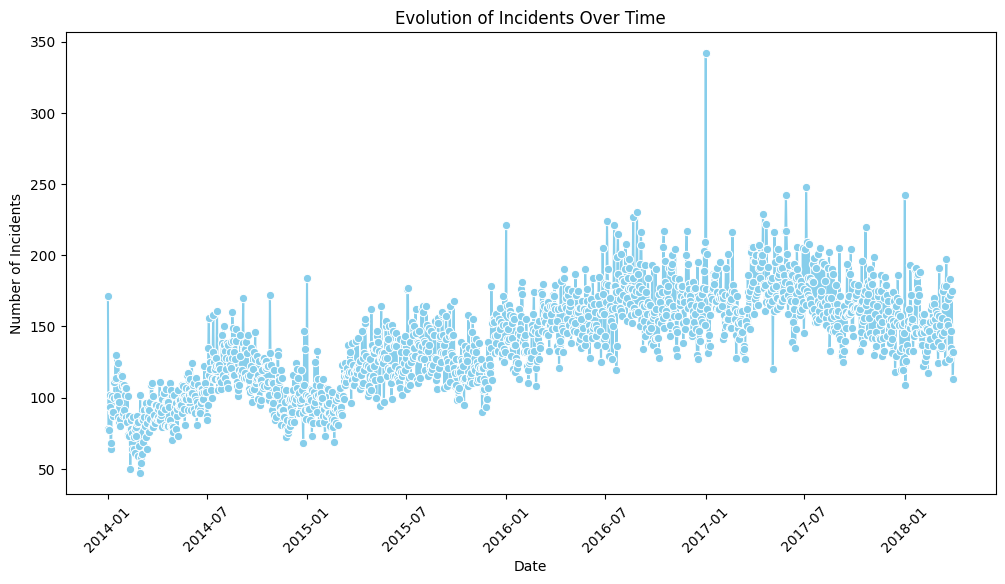

In [465]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

#### Geographical Distribution of Incidents

In [466]:
import geopandas as gpd

world_filepath = './110m_cultural/ne_110m_admin_0_countries.shp'
world = gpd.read_file(world_filepath)

# Create a GeoDataFrame from the incidents_dataset DataFrame
gdf = gpd.GeoDataFrame(incidents_dataset, geometry=gpd.points_from_xy(incidents_dataset.longitude, incidents_dataset.latitude))

# Plot the world map
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=incidents_dataset, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents')
plt.show()

ValueError: could not convert string to float: 'no_data'

##### Geographical data fixing

As we see in the data understanding section, there were some outliers in the geographical data, since it was visible that there were some incidents around India, when there would be just incidents from the USA.

To fix that we refined the filtering criteria based on the latitude and longitude values. We set the latitude and longitude ranges to cover the area of the United States, including Alaska and Hawaii that have different coordinates that the main US region. These adjusted ranges ensure that incidents falling within the geographical coordinates of the entire United States are retained in the filtered dataset. This refined filtering approach allows for the accurate representation of incident locations on the geographical scatter plot while eliminating data points located outside the intended area of interest.

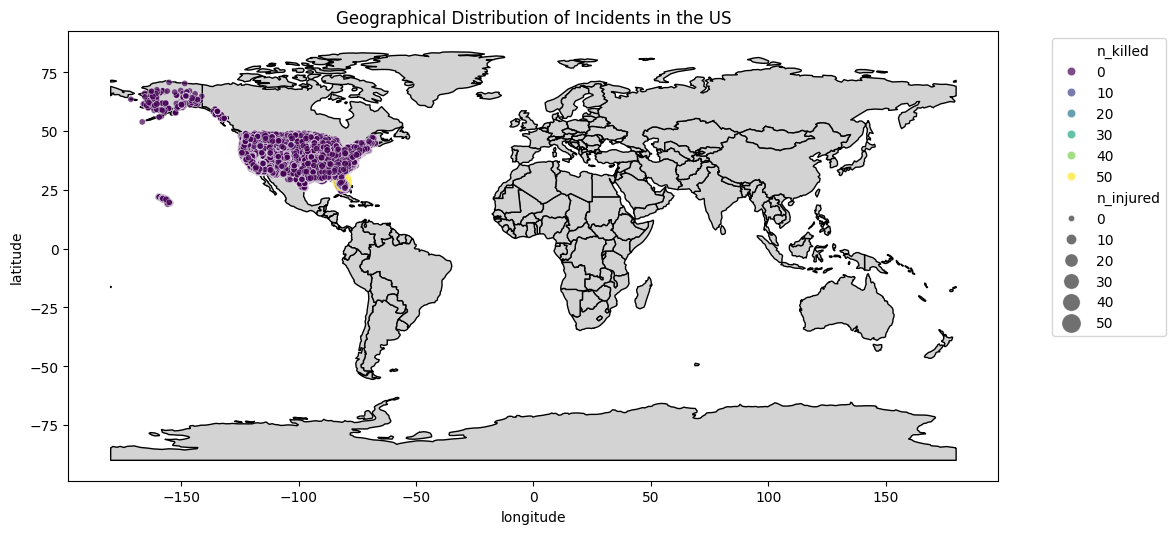

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the latitude and longitude ranges for the United States
us_latitude_range = (18, 71)
us_longitude_range = (-179, -66)

# Filter out incidents outside the US coordinates
incidents_dataset_us = incidents_dataset[(incidents_dataset['latitude'].between(*us_latitude_range)) &
                        (incidents_dataset['longitude'].between(*us_longitude_range))]

# Create a GeoDataFrame from the filtered dataset
gdf_us = gpd.GeoDataFrame(incidents_dataset_us, geometry=gpd.points_from_xy(incidents_dataset_us.longitude, incidents_dataset_us.latitude))

# Plot the world map
world_filepath = './110m_cultural/ne_110m_admin_0_countries.shp'
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map for the US incidents
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=incidents_dataset_us, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents in the US')
plt.show()


#### Distribution of Participant Age

Knowing the characteristics of the participants in the incidents it is one of the keys of our analysis, so we will start with the age of the participants. In the next graph we can have a preview of the distribution of the ages. We can see that there are ages that are greatear than 100 years, including an entry with 311 years which is the maximum. This is almost impossible, so we will remove the values that have participants older than 110 years.

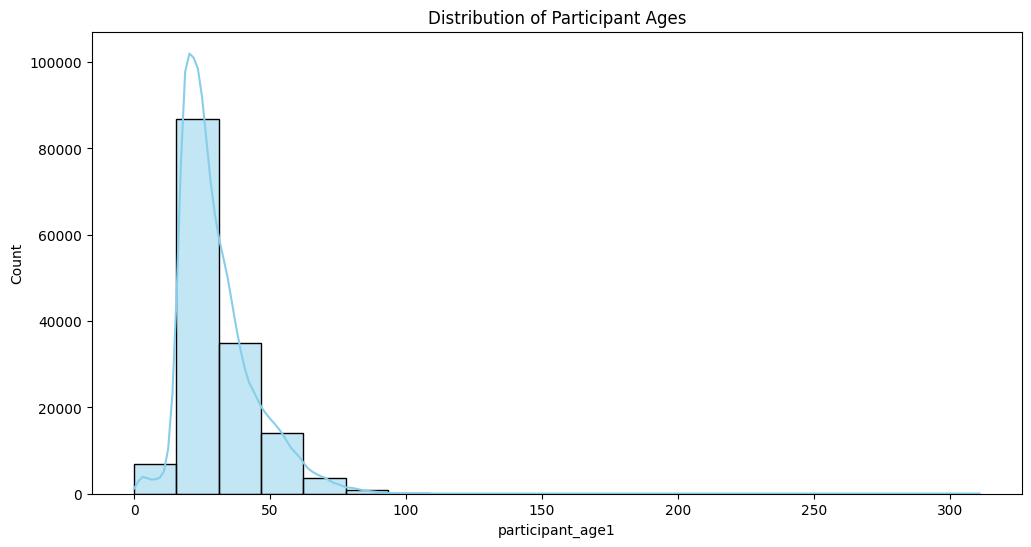

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=incidents_dataset, x='participant_age1', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Participant Ages')
plt.show()

In [ ]:
# Remove participants older than 110 years
incidents_dataset = incidents_dataset[incidents_dataset['participant_age1'] <= 110]

# Verify the changes
print(incidents_dataset['participant_age1'].describe())


count    146744.000000
mean         30.289068
std          13.329962
min           0.000000
25%          21.000000
50%          27.000000
75%          37.000000
max          99.000000
Name: participant_age1, dtype: float64


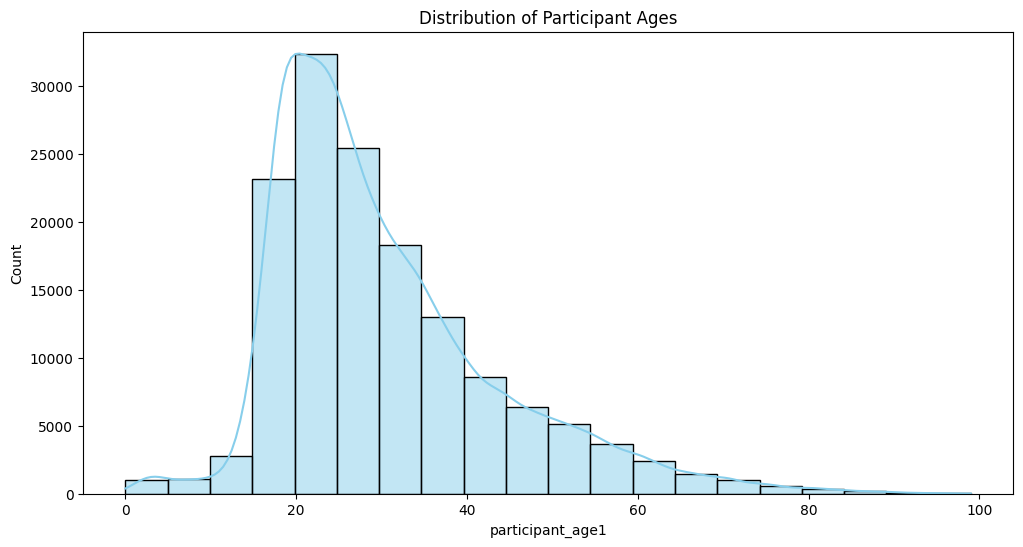

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=incidents_dataset, x='participant_age1', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Participant Ages')
plt.show()

#### Distribution of Participant Gender

Then we will analyze the gender of the participants. There are male and femaule values, but we also have an entry with the gender 'Male, female'. Since it is just one entry, and to simplify the analysis, we will remove this entry and just have female and male.

In [ ]:
gender_counts = incidents_dataset['participant_gender1'].value_counts()

# Print the counts
print("Gender Distribution:")
print(gender_counts)

Gender Distribution:
participant_gender1
Male      126333
Female     19203
Name: count, dtype: int64


In [ ]:
# Remove rows with 'participant_gender1' equal to "Male, female"
incidents_dataset = incidents_dataset[incidents_dataset['participant_gender1'] != "Male, female"]

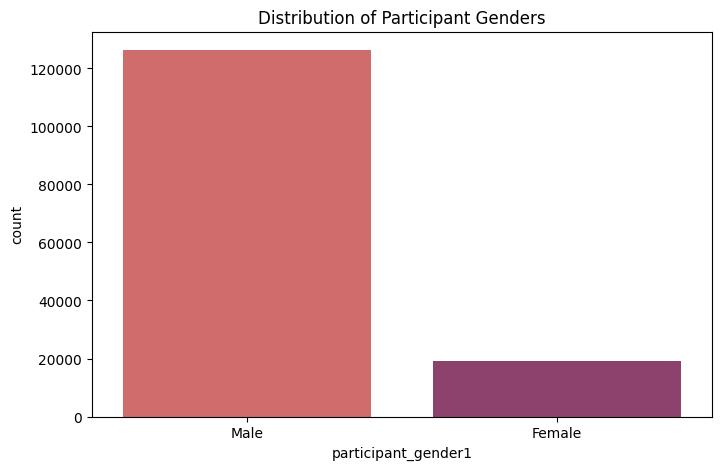

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=incidents_dataset, x='participant_gender1', palette='flare', hue='participant_gender1', legend=False)
plt.title('Distribution of Participant Genders')
plt.show()

#### Number of Participants and Casualties

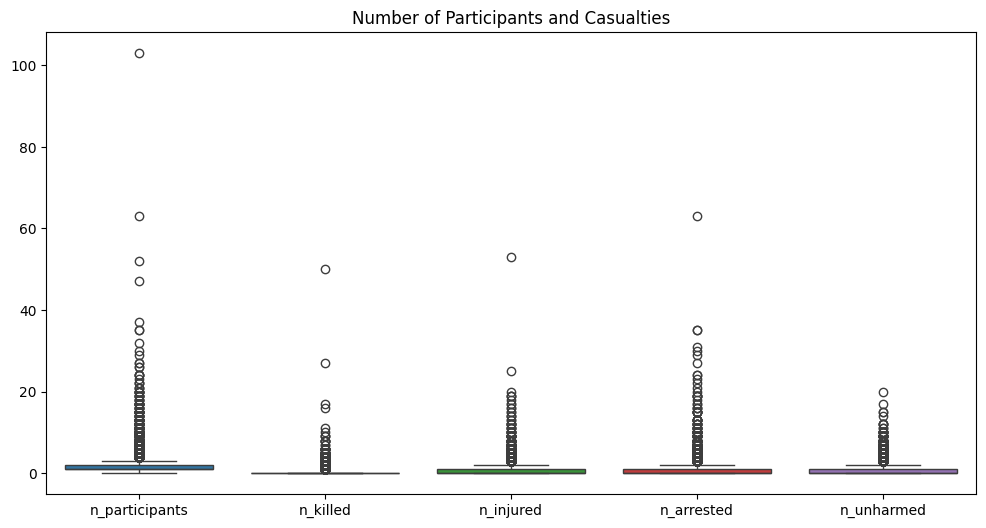

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=incidents_dataset[['n_participants', 'n_killed', 'n_injured','n_arrested', 'n_unharmed']])
plt.title('Number of Participants and Casualties')
plt.show()

#### Incident Characteristics

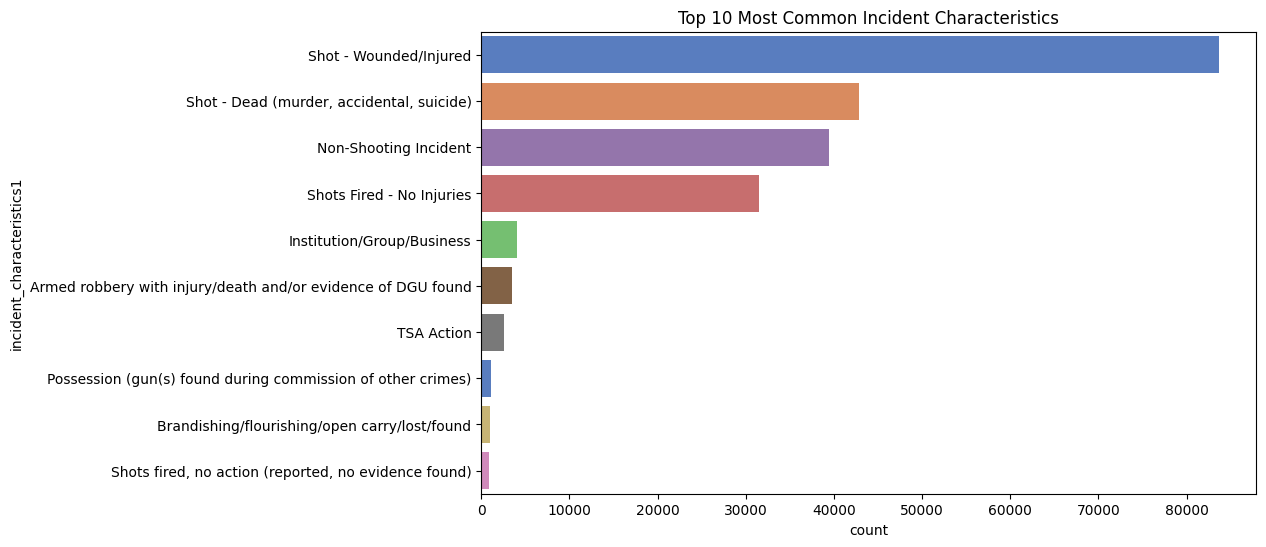

In [ ]:
# Get the top 10 most common incident characteristics
top10_characteristics = incidents_dataset['incident_characteristics1'].value_counts().nlargest(10).index

# Create a countplot with the top 10 incident characteristics
plt.figure(figsize=(10, 6))
sns.countplot(data=incidents_dataset, y='incident_characteristics1', order=top10_characteristics, palette='muted', hue='incident_characteristics1', legend=False)
plt.title('Top 10 Most Common Incident Characteristics')
plt.show()


### Pairwise correlation

To perform pairwise correlation analysis, `corr()` function of `pandas` can be used, to compute the correlation matrix and then visualize it using a heatmap.

The goal of pairwise correlation analysis is to understand the linear relationship between pairs of variables. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.

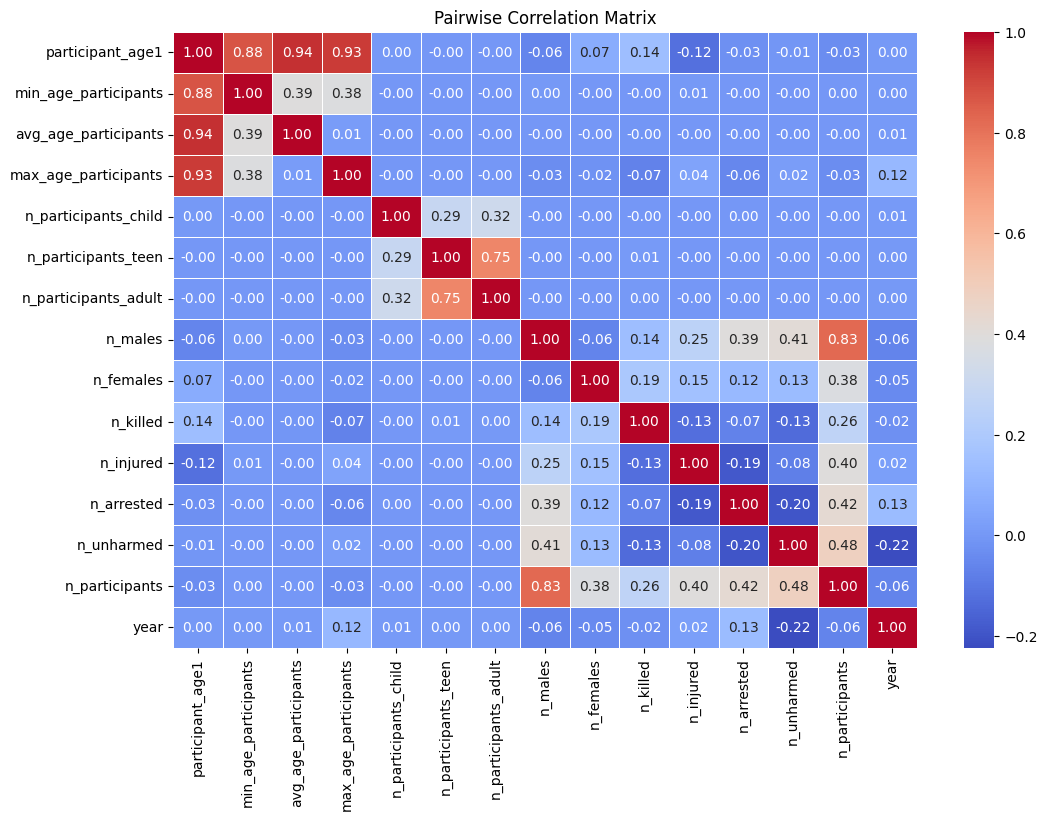

In [467]:
# Select numerical columns for correlation analysis
numerical_columns = incidents_dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pairwise Correlation Matrix')
plt.show()

#### Incidents and Poverty Rates Correlation:

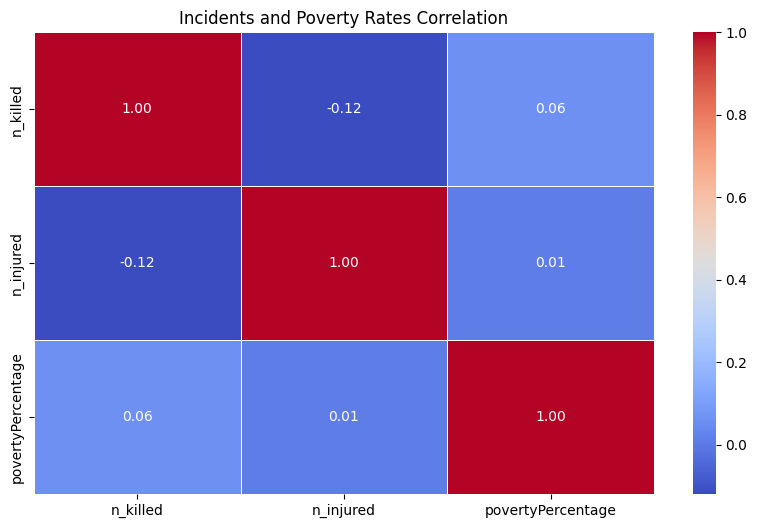

In [ ]:
# 'state' is the common column between incidents_dataset and pbsy_dataset
merged_incidents_dataset_2 = pd.merge(incidents_dataset, pbsy_dataset, on='state', how='inner')

# Compute the correlation matrix
correlation_matrix_incidents_poverty = merged_incidents_dataset_2[['n_killed', 'n_injured', 'povertyPercentage']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_incidents_poverty, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Incidents and Poverty Rates Correlation')
plt.show()


C:\Users\marcl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\marcl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


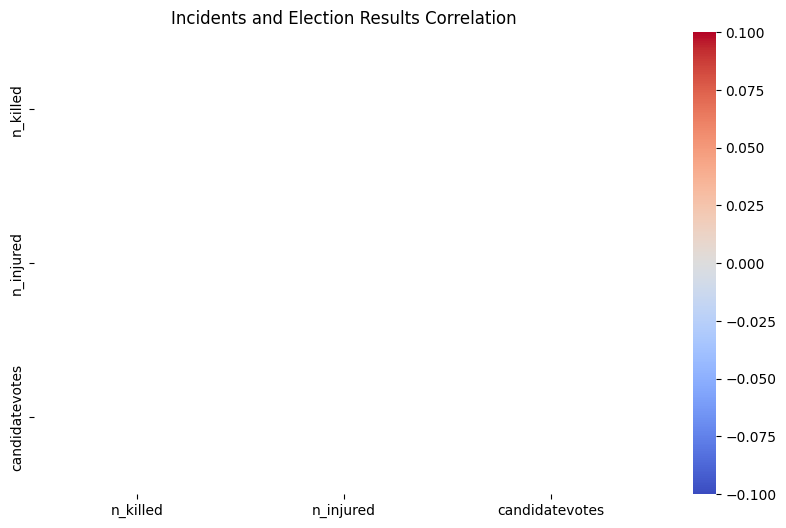

In [ ]:
# 'state' is the common column between incidents_dataset and ysdh_dataset
merged_incidents_dataset_3 = pd.merge(incidents_dataset, ysdh_dataset, on='state', how='inner')

# Compute the correlation matrix
correlation_matrix_incidents_election = merged_incidents_dataset_3[['n_killed', 'n_injured', 'candidatevotes']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_incidents_election, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Incidents and Election Results Correlation')
plt.show()


## Data Preparation